

# Visualizing Eigenvalue Concentration Phase Transition

Consider the following situation:
A Wigner matrix $A\in\mathbb{R}^{p\times p}$ has an expectation of 0.

By the Law of Large Numbers, each entry of the matrix converges to 0 as $p\rightarrow \infty$.

It would seem then, that as $p\rightarrow \infty$, the eigenvalues should all concentrate around zero. It turns out that this is not necessarily the case, depending on the scale of $p$.

Let's take a look.

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wigner_matrix(p, gamma=1, distribution="standard gaussian"):
    if distribution == "standard gaussian":
        A = np.random.randn(p, p)
    else:
        raise ValueError("Unsupported distribution")

    A = A * p**-gamma  # Scaling
    A = (A + A.T) / 2  # Make it symmetric
    return A

In order to observe the phase transition we will visualize two things. THe first will be a histogram of the eigenvalues. This is useful because it gives direct insight into what the **empirical distribution of eigenvalues** would look like, i.e.:
$$
\mu_p(x) = \frac{1}{p}\sum_{i=1}^p\delta_{\lambda_i}(x)
$$

Minimum eigenvalue: -0.047195185817917165
Maximum eigenvalue: 0.04754213155298333


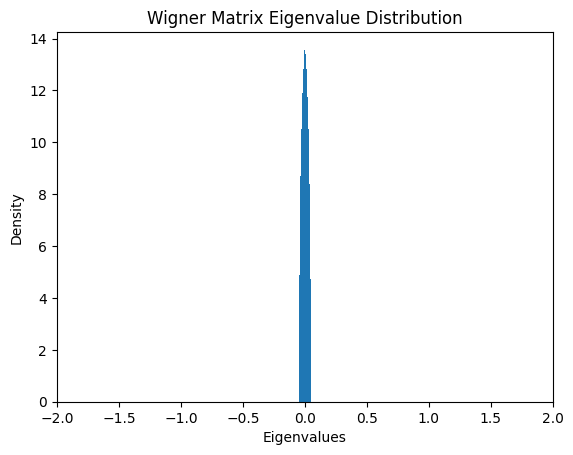

In [70]:
def plot_eigenvalue_histogram(A, gamma=1):
    eigenvalues = np.linalg.eigvals(A)
    print(f"Minimum eigenvalue: {np.min(eigenvalues)}\n"
          f"Maximum eigenvalue: {np.max(eigenvalues)}")
    p = A.shape[0]

    plt.figure()
    plt.hist(eigenvalues, bins="auto", density=True)
    plt.xlabel("Eigenvalues")
    plt.ylabel("Density")
    plt.title("Wigner Matrix Eigenvalue Distribution")
    plt.xlim(-2 * np.sqrt(p) * np.sqrt(p**-gamma), 2 * np.sqrt(p) * np.sqrt(p**-gamma))

    # Plot the theoretical semicircle
    # x = np.linspace(-2, 2, 500)
    # y = 0.5 * np.sqrt(4*p - x**2)
    # plt.plot(x, y)
    # plt.show()

M = generate_wigner_matrix(p=900, gamma=1)
plot_eigenvalue_histogram(M)

Another interesting thing to look at would be the diagonal entries of the **resolvent** matrix:
$$
S_p(z)=\left(A-zI_p\right)^{-1}
$$

In [60]:
def resolvent_entries(A):
    p = A.shape[0]
    ETA = 0.05j

    z_vals = np.linspace(-5, 5, 200) + ETA
    diags = np.zeros((p, len(z_vals)), dtype=np.complex128)
    for i, z in enumerate(z_vals):
        resolvent = np.linalg.inv(A - z*np.eye(p))
        resolvent_diag = np.diag(resolvent)
        diags[:, i] = resolvent_diag


M = generate_wigner_matrix(500)
resolvent_entries(M)

So far, we have seen the case when $a_{i,j}\sim O\left(\frac{1}{p}\right)$. In this case, the empirical eigenvalue distribution is concentrated as a semicircle. <what about the resolvent?>

Interestingly, this is not the case when we increase the scale of $a_{i,j}$. Let's first consider the case where $a_{i,j}\sim O\left(\frac{1}{p^2}\right)$

Minimum eigenvalue: -1.6552703882587893e-06
Maximum eigenvalue: 1.6561428671319672e-06


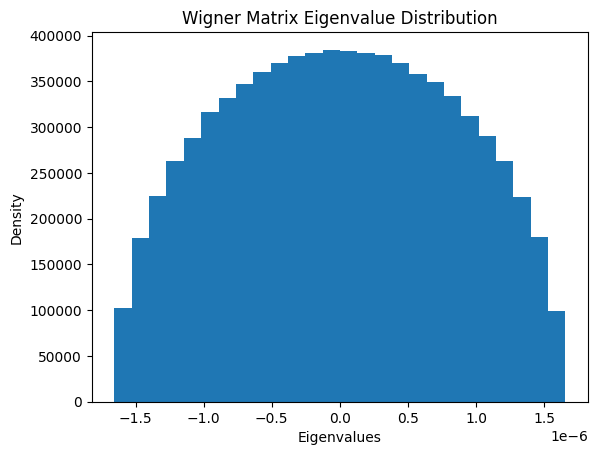

In [64]:
M = generate_wigner_matrix(p=9000, gamma=2)
plot_eigenvalue_histogram(M)